# Census Income Project

In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

## Description of dataset

### Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## Loading Database

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/census_income.csv')
df.shape

# (32560, 15)

(32560, 15)

In [3]:
pd.set_option('display.max_rows', None)  # to maximize the rows
pd.set_option('display.max_columns', None)  # to maximize the columns

In [4]:
df.head()  # top 5 rows

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.sample()  # random one row

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
22458,33,Private,159888,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## Information about dataset

In [7]:
df.info()

#  #   Column          Non-Null Count  Dtype 
# ---  ------          --------------  ----- 
#  0   Age             32560 non-null  int64 
#  1   Workclass       32560 non-null  object
#  2   Fnlwgt          32560 non-null  int64 
#  3   Education       32560 non-null  object
#  4   Education_num   32560 non-null  int64 
#  5   Marital_status  32560 non-null  object
#  6   Occupation      32560 non-null  object
#  7   Relationship    32560 non-null  object
#  8   Race            32560 non-null  object
#  9   Sex             32560 non-null  object
#  10  Capital_gain    32560 non-null  int64 
#  11  Capital_loss    32560 non-null  int64 
#  12  Hours_per_week  32560 non-null  int64 
#  13  Native_country  32560 non-null  object
#  14  Income          32560 non-null  object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Every column is containing 32560 non null values means, no null value present in the dataset
# 9 columns are of object type and rest are of int64 type

## Null value checking 

In [9]:
df.isnull().sum().sum()

# 0 (No null value present in the dataset)

0

<AxesSubplot:>

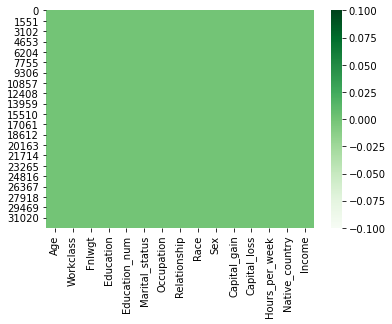

In [10]:
sns.heatmap(df.isnull(), cmap = 'Greens')

In [11]:
# Heatmap is clear, means not null point present 

## Data Preprocessing

#### Deleting columns which are not necessary for Training the model

In [12]:
# Extracting all object type columns
cat_col = df.select_dtypes(include = 'object').keys()
print(cat_col)
print(len(cat_col))

# Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
#        'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
#       dtype='object')
# 9

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')
9


In [13]:
# Extracing all int type columns
int_col = df.select_dtypes(include = 'int64').keys()
print(int_col)
print(len(int_col))

# Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
#        'Hours_per_week'],
#       dtype='object')
# 6

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')
6


In [14]:
df.dtypes

# Age                int64
# Workclass         object
# Fnlwgt             int64
# Education         object
# Education_num      int64
# Marital_status    object
# Occupation        object
# Relationship      object
# Race              object
# Sex               object
# Capital_gain       int64
# Capital_loss       int64
# Hours_per_week     int64
# Native_country    object
# Income            object

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [15]:
df.nunique()

# Age                  73
# Workclass             9
# Fnlwgt            21647
# Education            16
# Education_num        16
# Marital_status        7
# Occupation           15
# Relationship          6
# Race                  5
# Sex                   2
# Capital_gain        119
# Capital_loss         92
# Hours_per_week       94
# Native_country       42
# Income                2

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

##### Value_counts for categorical columns

In [16]:
for i in cat_col:
    print('___________________________', i, ' column ___________________________')
    print(df[i].value_counts())
    print('\n')

___________________________ Workclass  column ___________________________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


___________________________ Education  column ___________________________
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


___________________________ Marital_status  column ___________________________
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 S

In [17]:
# we do not have null values but in workclass column we are getting '?' 1836 time
# In Occupation column we are getting '?' 1843 times
# In Native_country column we are getting '?' 583 times
# Need to work on it..

In [18]:
work_value = df['Workclass'].value_counts()
for i in work_value.keys():
    if i == ' ?':
        print(i,'percenatage in the column')
        print(work_value[i]/df.shape[0] * 100)
        
# only 5.638820638820639 % values are '?' in this column, therefore we will delete this column. will perform some operation on it

# ? percenatage in the column
# 5.638820638820639

 ? percenatage in the column
5.638820638820639


In [19]:
work_value = df['Occupation'].value_counts()
for i in work_value.keys():
    if i == ' ?':
        print(i,'percenatage in the column')
        print(work_value[i]/df.shape[0] * 100)
        
# only 5.66031941031941 % value are ? in this column therefore, we will not delete, will perform some operation on it

#  ? percenatage in the column
# 5.66031941031941

 ? percenatage in the column
5.66031941031941


In [20]:
work_value = df['Native_country'].value_counts()
for i in work_value.keys():
    if i == ' ?':
        print(i,'percenatage in the column')
        print(work_value[i]/df.shape[0] * 100)
        
# Only 1.79 % values are ? in this column, need to perform some operation on this

# ? percenatage in the column
# 1.7905405405405406

 ? percenatage in the column
1.7905405405405406


#### Replacing Value of "?" with mode value of column

In [21]:
df['Workclass'] = df['Workclass'].replace(' ?',df['Workclass'].mode()[0] )

In [22]:
df['Occupation'] = df['Occupation'].replace(' ?', df['Occupation'].mode()[0])

In [23]:
df['Native_country'] = df['Native_country'].replace(' ?', df['Native_country'].mode()[0])

In [24]:
for i in cat_col:
    print('___________________________', i, ' column ___________________________')
    print(df[i].value_counts())
    print('\n')

___________________________ Workclass  column ___________________________
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


___________________________ Education  column ___________________________
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


___________________________ Marital_status  column ___________________________
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 10

In [25]:
# Now, we can see , no "?" values are present in the dataset
# all has been replace with mode of that column

In [26]:
cat_col

# Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
#        'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
#       dtype='object')

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

### Feature Engineering

##### For Maritial_status Column

In [27]:
df['Marital_status'].unique()

# array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
#        ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
#       dtype=object)

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [28]:
# as we can see in above observation Marital_status column is containing so many unique value, we can convert them into
# few meaningfull class value

# [' Married-civ-spouse', ' Married-AF-spouse' ] as 'Married'
# [' Divorced', ' Separated', ' Married-spouse-absent', ' Widowed' ] as 'Other'
# [ ' Never-married'] as 'Unmarried'

In [29]:
df['Marital_status'] = df['Marital_status'].replace([' Married-civ-spouse', ' Married-AF-spouse' ], 'Married' )
df['Marital_status'] = df['Marital_status'].replace([' Divorced', ' Separated', ' Married-spouse-absent', ' Widowed' ], 'Other')
df['Marital_status'] = df['Marital_status'].replace([ ' Never-married'], 'Unmarried')

In [30]:
df['Marital_status'].unique()

# array(['Married', 'Other', 'Unmarried'], dtype=object)

array(['Married', 'Other', 'Unmarried'], dtype=object)

In [31]:
# Now, Marital_status column have only three unique class which is clearly meaniingfull

##### For Education Column

In [32]:
# as we can see in above observation, Education is containing so many unique values, we can reduce these unstructed
# column into structured, Therefore, we can replace :
# [' 11th', ' 9th',' 7th-8th' , ' Preschool', ' 5th-6th', ' 10th', ' 1st-4th'] these with 'School' and
# [' Assoc-voc', ' Prof-school', ' Some-college', ' Assoc-acdm' ] with 'Higher Education'

In [33]:
df['Education'] =df['Education'].replace([' 11th', ' 9th',' 12th',' 7th-8th' , ' Preschool', ' 5th-6th', ' 10th', ' 1st-4th'], 'School')
df['Education'] =df['Education'].replace([' Assoc-voc', ' Prof-school', ' Some-college', ' Assoc-acdm' ], 'Higher Education')

In [34]:
df['Education'].unique()

# array([' Bachelors', ' HS-grad', 'School', ' Masters', 'Higher Education',
#        ' Doctorate'], dtype=object)

array([' Bachelors', ' HS-grad', 'School', ' Masters', 'Higher Education',
       ' Doctorate'], dtype=object)

## Visualization

### For Categorical columns

In [35]:
cat_col

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

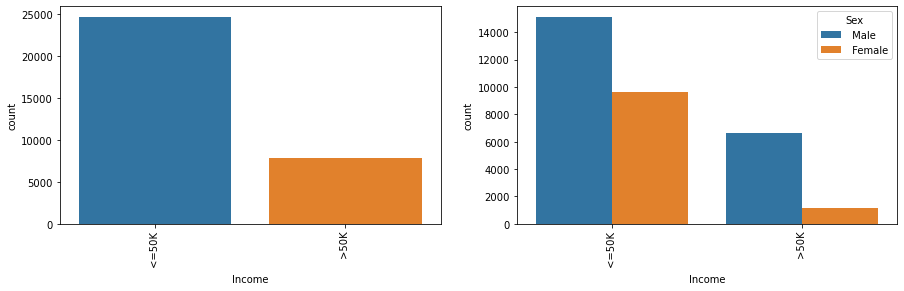

In [36]:
plt.figure(figsize= (15, 4))
l = list(df.Income.unique())
plt.subplot(1,2, 1)
bar = sns.countplot(df['Income'])
bar.set_xticklabels(labels = l, rotation = 90)

plt.subplot(1,2, 2)
bar1 = sns.countplot(df['Income'], hue = df['Sex'])
bar1.set_xticklabels(labels = l, rotation = 90)

plt.show()

In [37]:
# Maximum people are taking income <=50, very less people are geetting >50K income
# in Female, very less females are getting income >50
# As we know, this variable is our target variable, therefore we need to balance this too.

In [38]:
cat_col

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

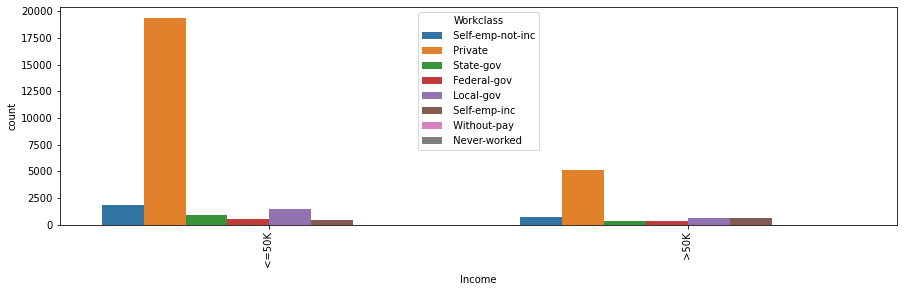

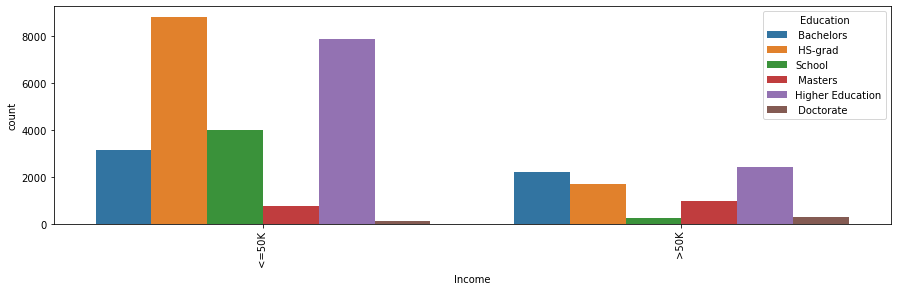

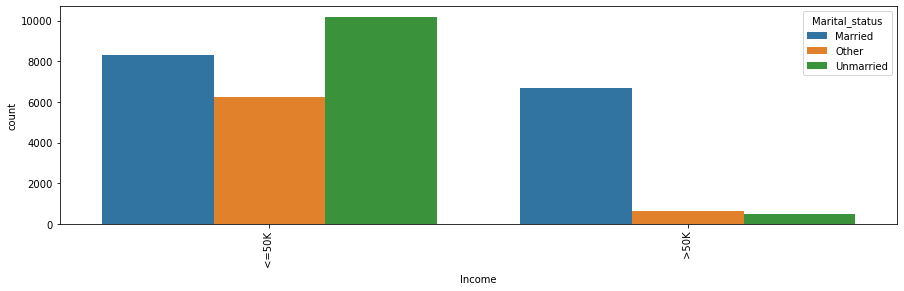

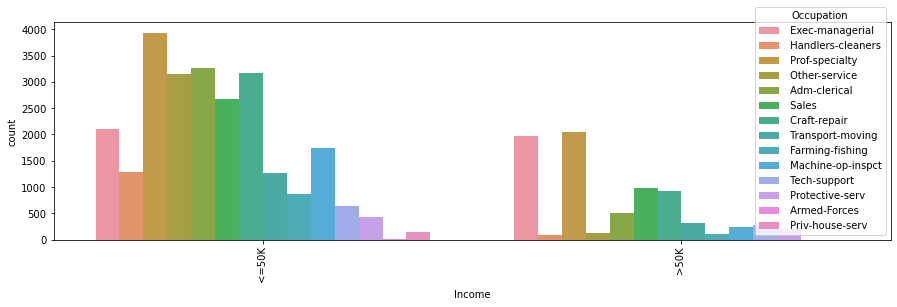

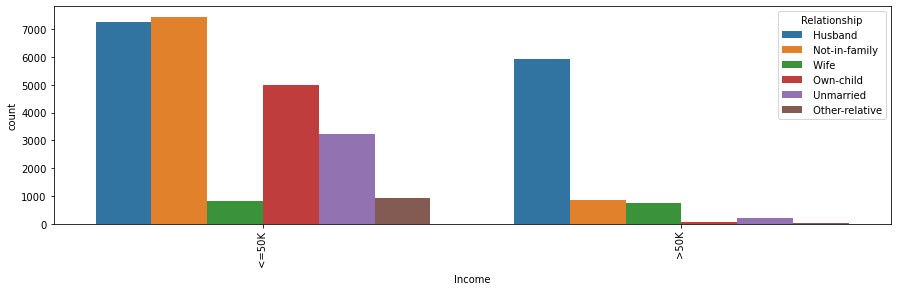

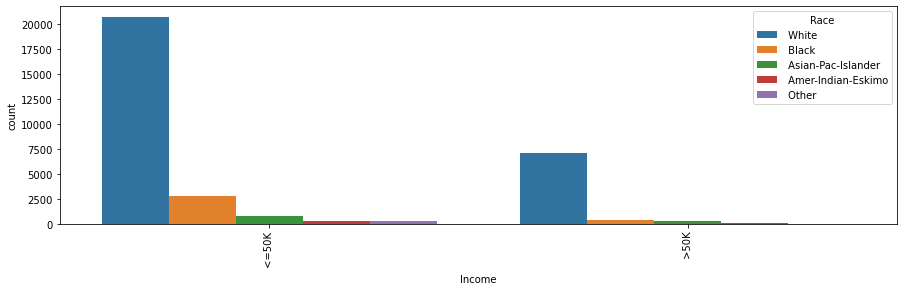

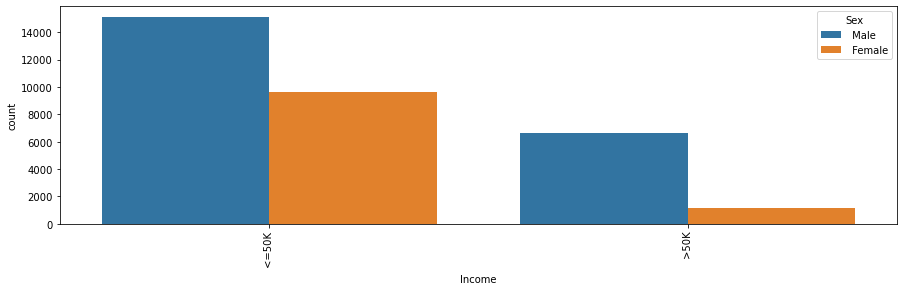

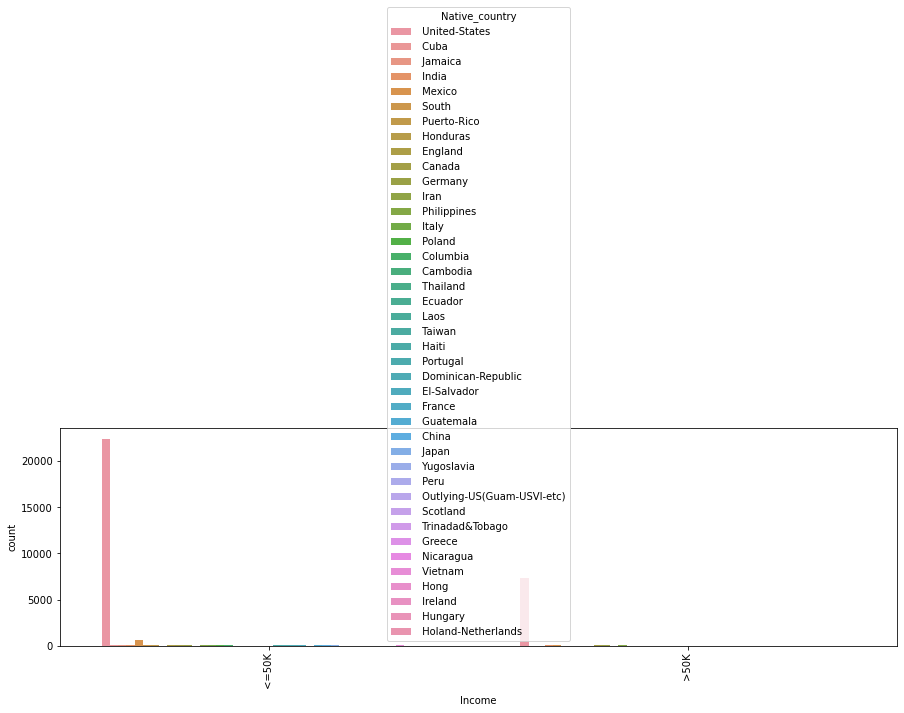

In [39]:
cat_lst = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

for i in cat_col[:-1]:
    
    plt.figure(figsize= (15, 4))
    l = list(df.Income.unique())
    bar = sns.countplot(df['Income'], hue = df[i])
    bar.set_xticklabels(labels = l, rotation = 90)

    plt.show()

In [40]:
# Income with Workclass:
# maximum people who are getting >50 are from private sector

# Income with Education
# Higher Education is fist tool to get income >50K
# Mainly HS-grad and Higher Education class is having highest chance to get selected in any of both cateogory

# Income with Marital Status
# Mainly who are  Married, they are getting >50K
# Very less people are getting >50K and they are unmmaried
# Majority of Unmarried population are getting <=50K income

# Income with occupation:
# mainly two type of person are getting >50 who is Pro-Specialty or Exec-managerial
# Prof-specially, other-service, adm-clerical, sales, craft-repair and Transport moving, These are the main source of 
# occupatioin

# Income with Relationship
# if a person having Own-child, unmarried status or Other-relative then he have very less chance to get income >50K
# If a individual having husband then chancing are increasing to get income >50K


# Income with Race
# If a individual having Amer-indian Eskimo or other then he is not getting income > 50K
# If havind Race-> white then high chance to get one of these two

# Income with Native Country
# United State having highest observation of population 
# As followed by above, United state country have highest chances in both class of income

In [41]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:ylabel='Income'>

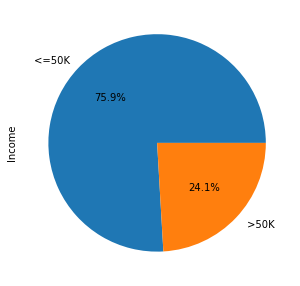

In [42]:
# We can see percentage of each columns classes
plt.figure(figsize = (8, 5))
df['Income'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

# 75.9 % population are getting <=50K whereas, 24.1 % are gettin >50K

<AxesSubplot:ylabel='Sex'>

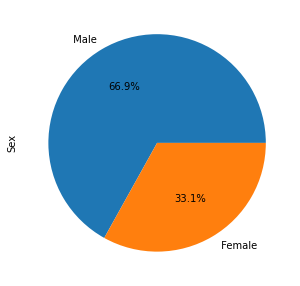

In [43]:
# We can see percentage of each columns classes
plt.figure(figsize = (8, 5))
df['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

# Male population is higher then female population 
# 66.9 % population are male and 33.1 % are Female

<AxesSubplot:ylabel='Marital_status'>

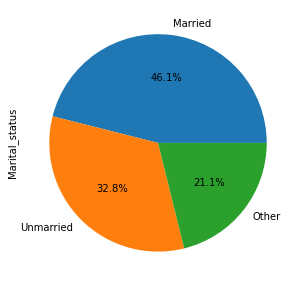

In [44]:
# We can see percentage of each columns classes
plt.figure(figsize = (8, 5))
df['Marital_status'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

# Majority of  population is having relationship "Married-civ-spouse"
# and least having "married AF spouse" relationship

<AxesSubplot:ylabel='Education'>

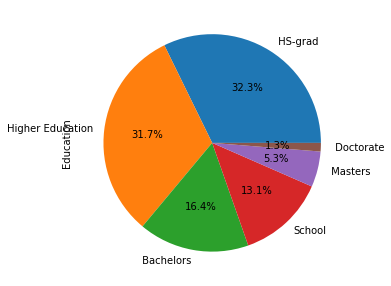

In [45]:
# We can see percentage of each columns classes
plt.figure(figsize = (8, 5))
df['Education'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

# Majorty of population having HS Grad , very less people are Docorate

<AxesSubplot:ylabel='Race'>

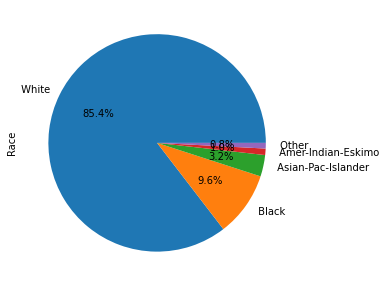

In [46]:
# We can see percentage of each columns classes
plt.figure(figsize = (8, 5))
df['Race'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

# Majority of Population having race "White" and least having other

### For int Columns

In [47]:
int_col

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

### Checking Ouliers

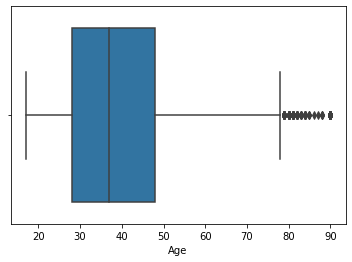

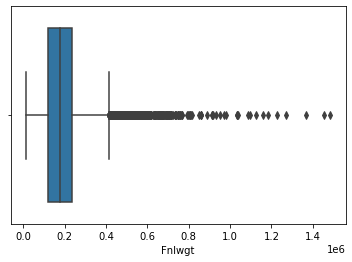

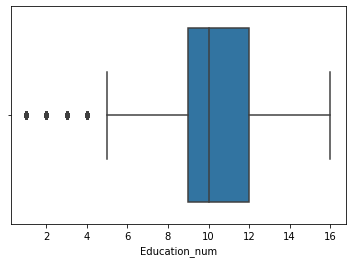

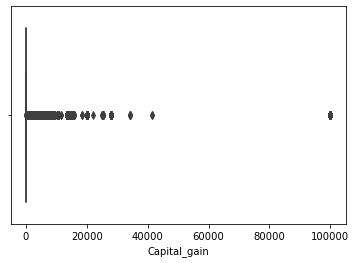

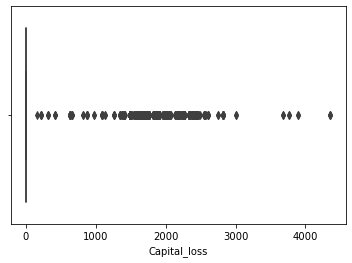

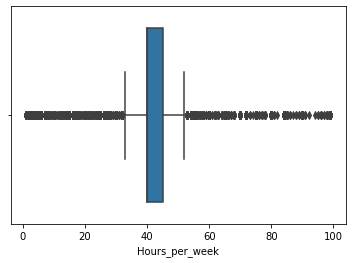

In [48]:
for i in int_col:
    plt.figure()
    sns.boxplot(df[i])

In [49]:
# So, many outliers are present in the each int columns nee to work on it
# less oulliers are present in the Education num column
# Two columns, capital gain and capital loss having lots of ouliers, and maximum values are 0 in these columns
# Not contributing to predict target


### Check Skewness

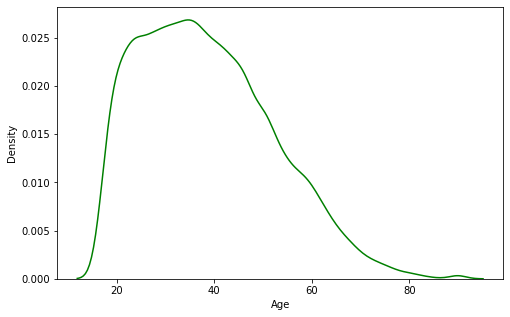

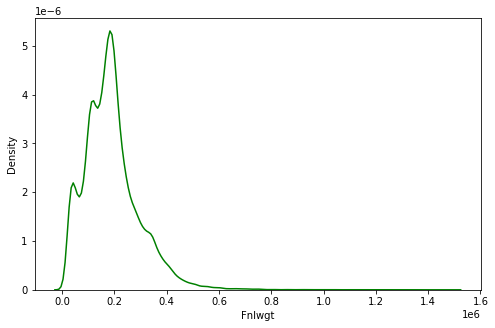

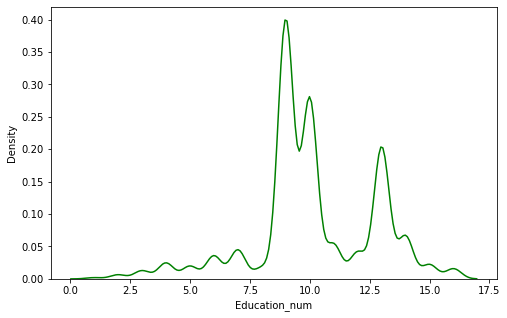

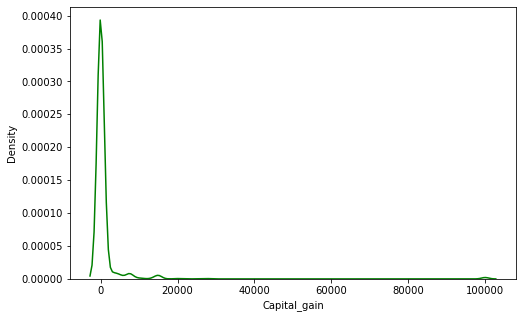

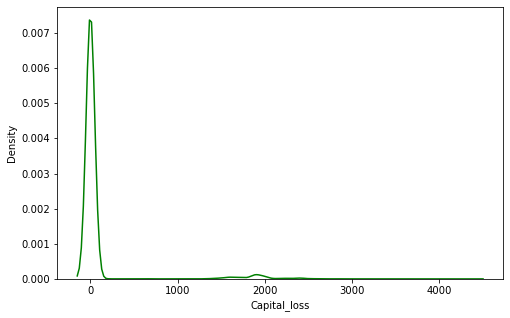

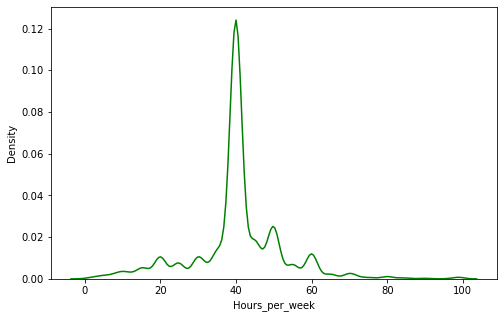

In [50]:
for i in int_col:
    plt.figure(figsize = (8,5))
    sns.distplot(df[i], color = 'g', hist = False)

In [51]:
# Age column is litle ryt skewed
# Fnlwgt column is maximum at 0.2 not showing ryt skewness
# High variance  persent in the Education_num olumns
# capital gain and capital los columns are having so many outliers
# 0 hours working is not possible, but it showing minimum therefore need to remove ouliers from this too
# showingh max value at Hours_per_week

### Distribution of Columns

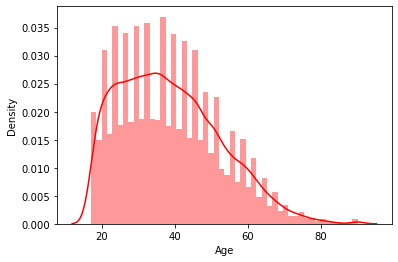

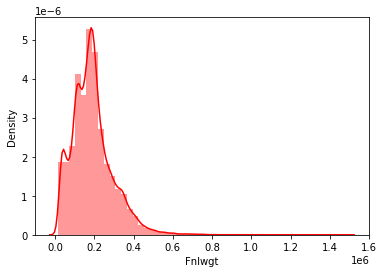

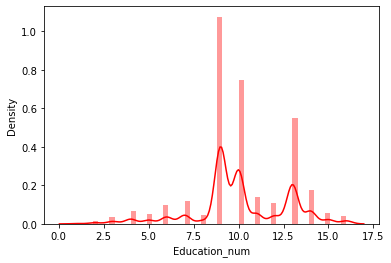

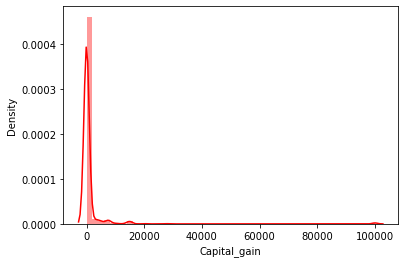

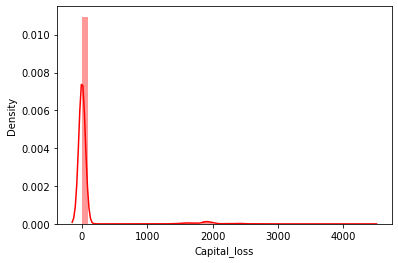

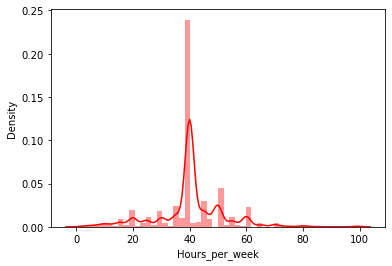

In [52]:
for i in int_col:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')

In [53]:
# Age, Fnlwgt columns are not normally distributed
# Hours_per_week  is almost normally distributed, but showing high variance and maximum value at 40
# FnlWeight column and education num is not normally distributed
# Capital_gain, and capital loss are showing high outliers presence 

### Spread of Columns

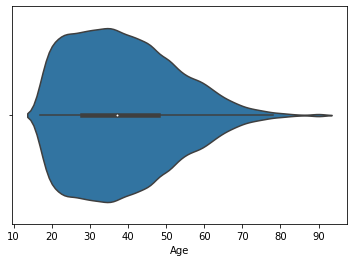

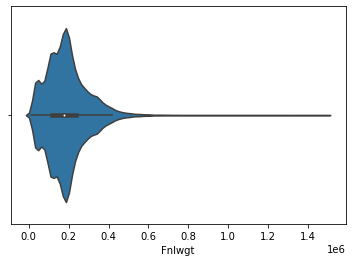

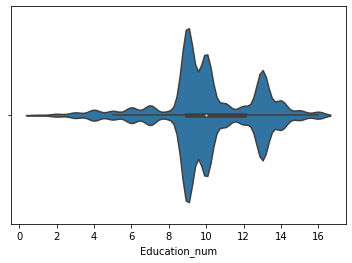

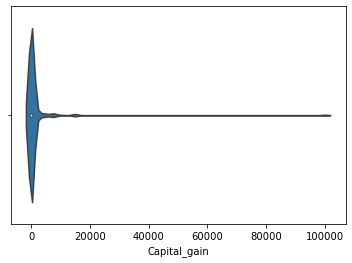

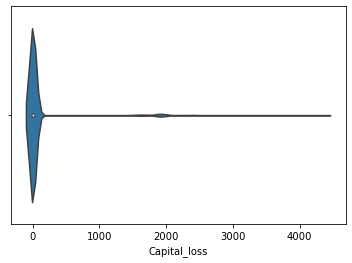

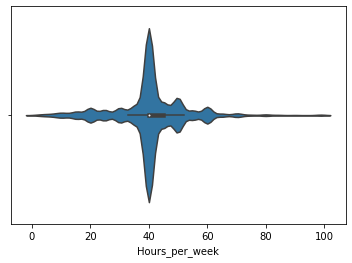

In [54]:
for i in int_col:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

In [55]:
# Age, Dailyrate, HourlyRate, Monthly rate  are well spreaded
# other than these columns, data is not well distributed, it is showing classes wise data distribution
# in capitalgain and l0ss columns having maximm null values
# maximum hours_per_week is maxium at 40

### Knowing the pattern of data

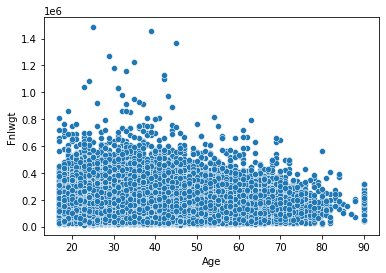

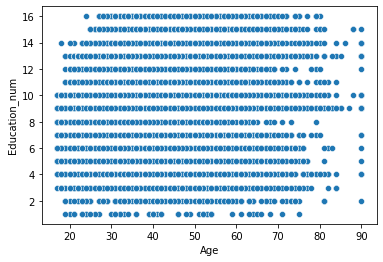

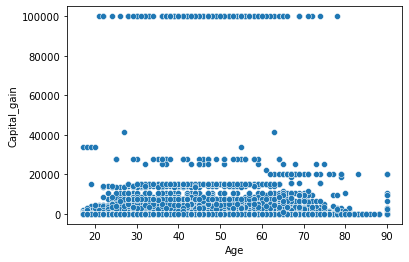

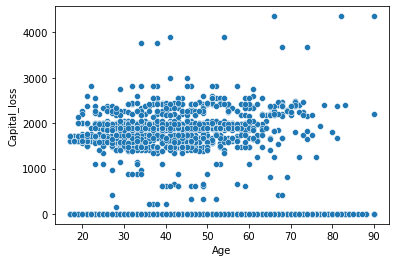

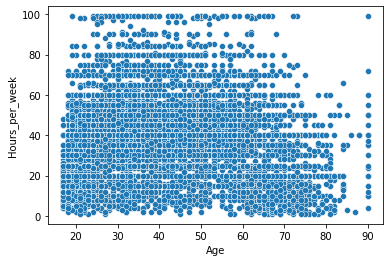

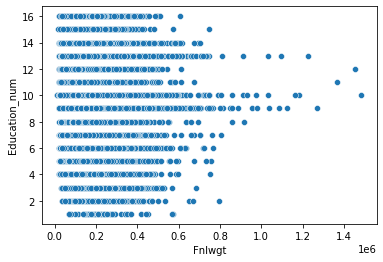

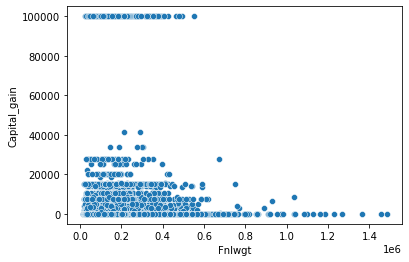

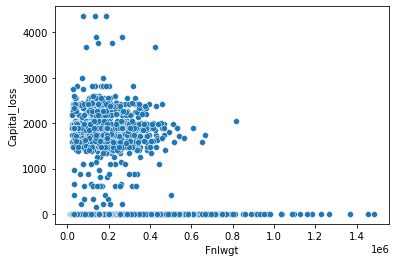

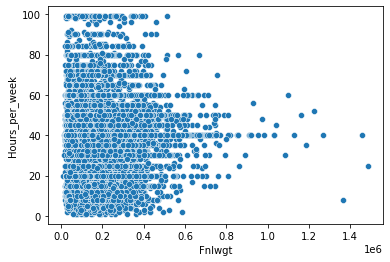

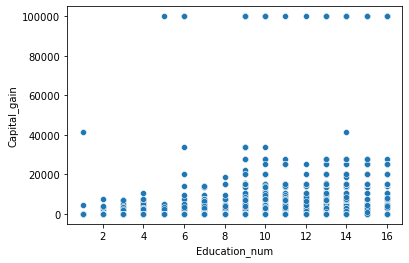

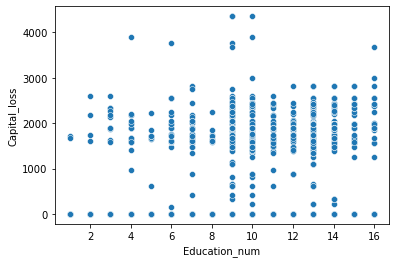

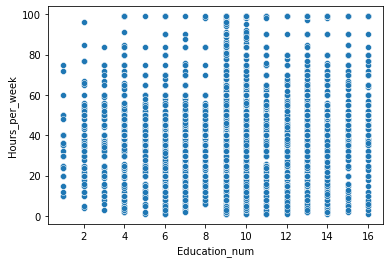

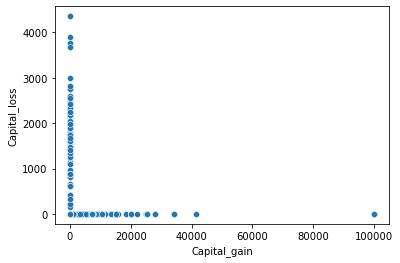

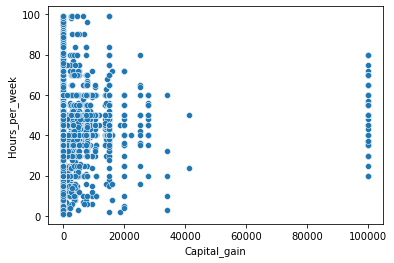

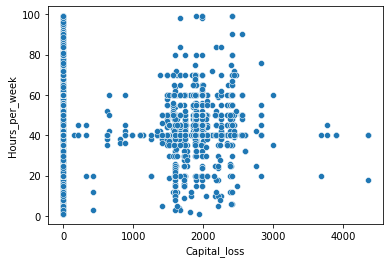

In [56]:
for i in range(len(int_col)):

    for j in int_col[i+1:]:    
        plt.figure()
        sns.scatterplot(df[int_col[i]], df[j])

In [57]:
# 'no pattern found in int_cat

In [58]:
# for i in range(len(int_col)):

#     for j in int_col[i+1:]:    
#         plt.figure()
#         sns.lineplot(df[int_col[i]], df[j])

# This line of code taking so much therefore now, will create one by one line plot

int_col

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

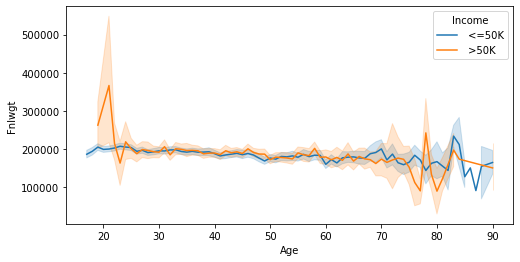

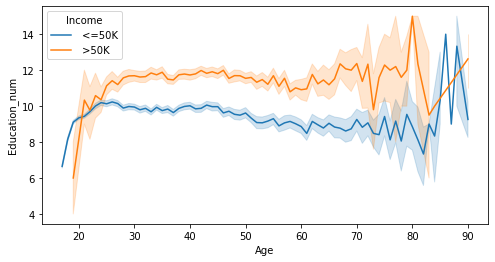

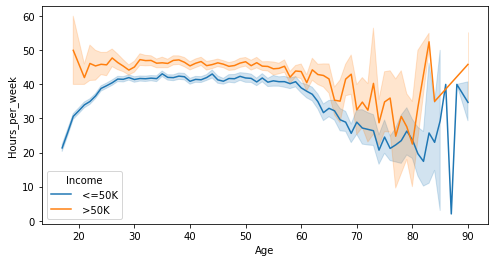

In [59]:
for i in ['Fnlwgt', 'Education_num', 'Hours_per_week'] :
    
    plt.figure(figsize=(8,4))
    sns.lineplot(x = df['Age'] ,y = df[i],hue = df['Income'])
    plt.show()

In [60]:
# FnlWgt with AGe:
# Final weight is maximum at 20 age and least at 90 age
# In the age range of 22 to 72 approx, seems equal final weight 
# # Final weight is showing some changes in age range of 75 to 90

# Education with Age
# Highest education point is getting who is 80 age
# least who is 18 year approx
# In age betwwen 25 to 80 who difference in repect of Income getting based on their Education point

# Hours Per week with Age:
# Least Hour_per_week is showing at the age of 86 or 87 approx
# maxium at 82 approx who is getting income > 50K

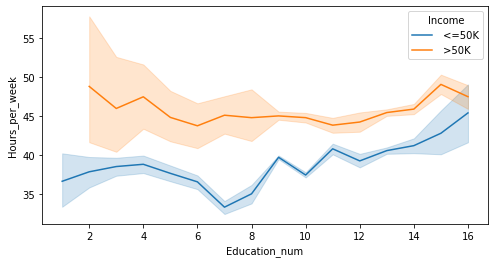

In [61]:
plt.figure(figsize=(8,4))
sns.lineplot(x = df['Education_num'] ,y = df['Hours_per_week'],hue = df['Income'])
plt.show()

In [62]:
# As education is going up , person need to spend more hours per week
# Who having not much euducation point and getting salary <=50K are spending less hours per week
# WHo is getting income > 50K they are spending more hours per week as compare to other income getting <=50K persons

In [63]:
print(int_col)
print(cat_col)

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')
Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

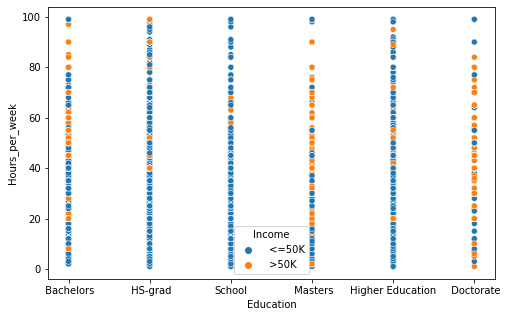

In [64]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'Education', y = 'Hours_per_week', hue = 'Income' ,data = df)

In [65]:
# Maximum hours per week in each education group is 100
# In education of Masters and Doctorate , very less people are spending 78 to 90 Hours per week

<AxesSubplot:xlabel='Education', ylabel='Age'>

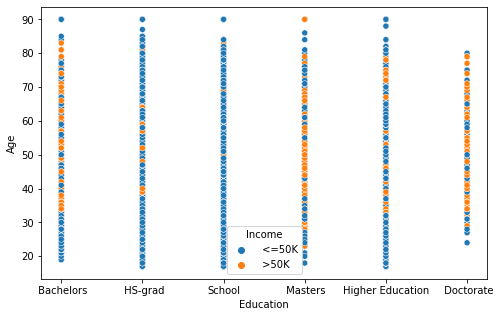

In [66]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'Education', y = 'Age', hue = 'Income' ,data = df)

In [67]:
# Doctorate are in the age group of 25 to 80
# All Education person are gettin >50 K salary except school person 
# maximum doctorate , Bachelors and Masters are getting > 50K

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

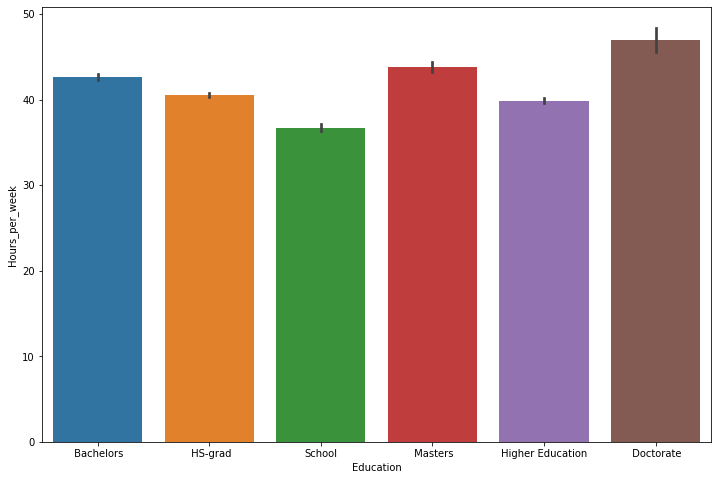

In [68]:
plt.figure(figsize= (12,8))
sns.barplot(x = df['Education'], y = df['Hours_per_week'])

# person who is Doctorate, spending more Hours_per_week, meanings working more as compare to other
# and least hours_per_week is from School pursuing population

### Correlation of the columns

In [69]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

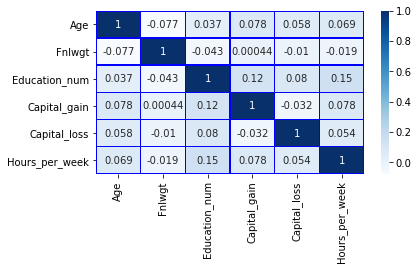

In [70]:
plt.figure(figsize = (6, 3))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [71]:
# no column is showing high co-relation
# all correlation value of each column are in acceptable range

### Describe Data

In [72]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

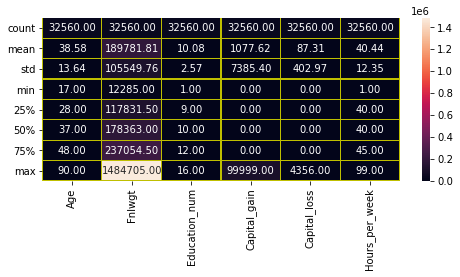

In [73]:
plt.figure(figsize = (8, 3))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [74]:
# All columns are not showing much difference between mean and 50 percentile except (captal gain and apital loss),
# which is telling that columns are toward norml distribution

# (captal gain and apital loss) are highly non normal distributed column

#### Checking the columns which are positively and negative correlated with the target columns

In [75]:
# plt.figure(figsize = (15, 10))
# train.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'black')
# plt.xlabel( 'Feature', fontsize = 18)
# plt.ylabel( 'Columns with target names', fontsize = 18)
# plt.title ('Correlation', fontsize = 18)
# plt.show()

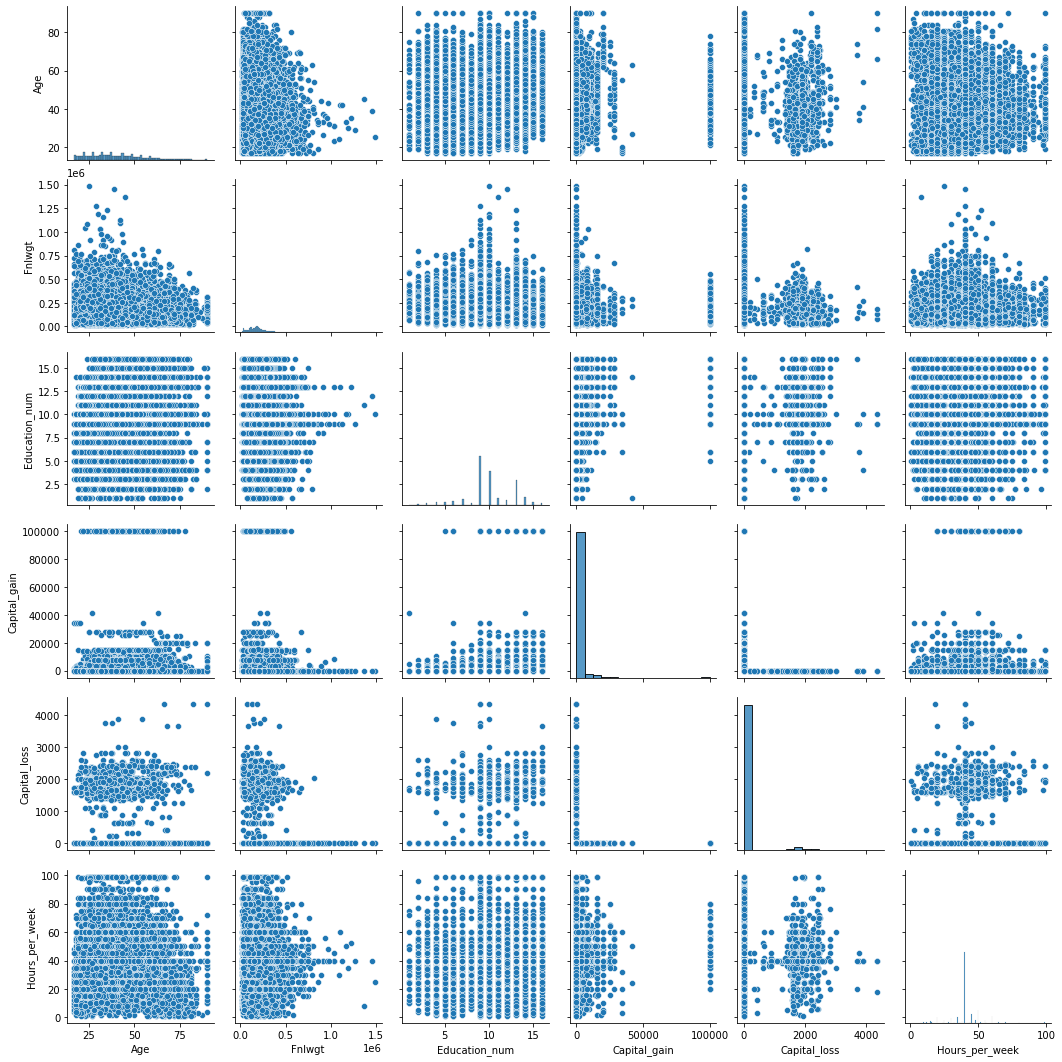

In [76]:
sns.pairplot(df)

## Encoding

In [77]:
df.columns

# Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
#        'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
#        'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
#        'Income'],
#       dtype='object')

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [78]:
from sklearn.preprocessing import LabelEncoder

#### Applying LabelEncoder to the Target Variable (Income)

In [79]:
le = LabelEncoder()

In [80]:
df['Income'] = le.fit_transform(df['Income'])

In [81]:
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [82]:
df.Income.unique() 
# array([0, 1])

array([0, 1])

#### Applying OneHotEncoder to other categorical columns

In [83]:
categorical = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

In [84]:
for i in categorical:
    print(i,'column having ',df[i].nunique(),'values')
#     print('\n')
# Workclass column having  8 values
# Education column having  6 values
# Marital_status column having  3 values
# Occupation column having  14 values
# Relationship column having  6 values
# Race column having  5 values
# Sex column having  2 values
# Native_country column having  41 values

Workclass column having  8 values
Education column having  6 values
Marital_status column having  3 values
Occupation column having  14 values
Relationship column having  6 values
Race column having  5 values
Sex column having  2 values
Native_country column having  41 values


In [85]:
encoded_df = pd.get_dummies(df, columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country'] )

In [86]:
encoded_df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_Higher Education,Education_School,Marital_status_Married,Marital_status_Other,Marital_status_Unmarried,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [87]:
encoded_df.dtypes

# Age                                           int64
# Fnlwgt                                        int64
# Education_num                                 int64
# Capital_gain                                  int64
# Capital_loss                                  int64
# Hours_per_week                                int64
# Income                                        int32
# Workclass_ Federal-gov                        uint8
# all other encoded columns are of uint8

Age                                           int64
Fnlwgt                                        int64
Education_num                                 int64
Capital_gain                                  int64
Capital_loss                                  int64
Hours_per_week                                int64
Income                                        int32
Workclass_ Federal-gov                        uint8
Workclass_ Local-gov                          uint8
Workclass_ Never-worked                       uint8
Workclass_ Private                            uint8
Workclass_ Self-emp-inc                       uint8
Workclass_ Self-emp-not-inc                   uint8
Workclass_ State-gov                          uint8
Workclass_ Without-pay                        uint8
Education_ Bachelors                          uint8
Education_ Doctorate                          uint8
Education_ HS-grad                            uint8
Education_ Masters                            uint8
Education_Hi

In [88]:
encoded_df.shape
# (32560, 92)

(32560, 92)

In [89]:
encoded_df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_Higher Education,Education_School,Marital_status_Married,Marital_status_Other,Marital_status_Unmarried,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Checking impect of variables to the target variable

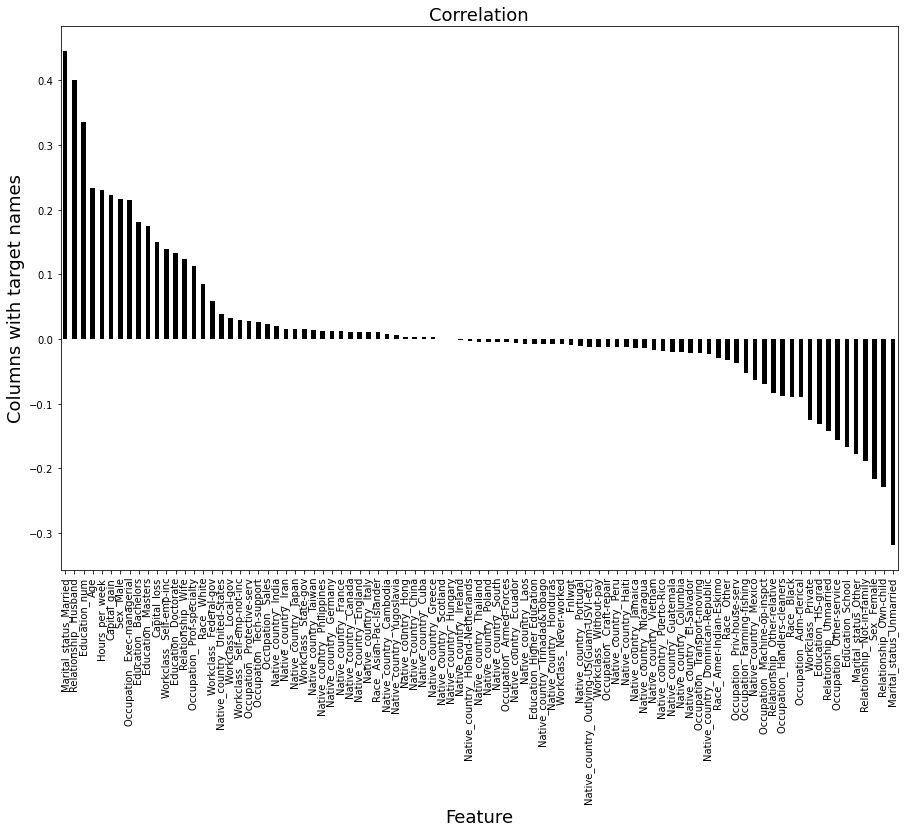

In [90]:
plt.figure(figsize = (15, 10))
encoded_df.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [91]:
# Marital_status_Married, Relationship_husband, Education_num, Age, Hours_per_week, Capital_gain, sex_mal,
# occupation Exec-Managenal, Education Bachelors, Education Masters columns are highly positively impecting to the target variable

# Marital_status_Unmarried, Relationhsip_own-child, Sex Female, Relationship Not Family, Marital Status Family, Education School
#  occupation Other service, These columns are highly negatively impecting to the target variable

### Remove Outliers

##### using zscore technique

In [92]:
from scipy.stats import zscore

In [93]:
z = np.abs(zscore(encoded_df) )
df_z = encoded_df[(z < 3).all(axis = 1)] 
df_z.shape

# (12078, 92)

(12078, 92)

In [94]:
(encoded_df.shape[0] - df_z.shape[0] ) / encoded_df.shape[0]

# 0.629054054054054  # This method is giving high loss of data
# Can not implement this method to remove outliers

# 0.629054054054054

0.629054054054054

##### Using IQR technique

In [95]:
Q1 = encoded_df.quantile(0.25)
Q3 = encoded_df.quantile(0.75)
IQR = Q3 - Q1 

In [96]:
df_IQR = encoded_df[~((encoded_df < (Q1 - 1.5*IQR) ) | (encoded_df > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape   # Complete dataloss
# can not use this method too, as it is giving complete data loss

# (0, 92)

(0, 92)

In [97]:
# As both methods zscore and IQR method are giving high loss of data , therefore we will not remove outliers
# and perform preceeding on existing data

In [98]:
encoded_df.shape

# (32560, 92)

(32560, 92)

In [99]:
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


### Seperating Data into x and y form

In [100]:
x = encoded_df.drop(columns = ['Income'])
y = encoded_df['Income']

print(x.shape)
print(y.shape)

# (32560, 91)
# (32560,)

(32560, 91)
(32560,)


In [101]:
y.unique()

# array([0, 1])


array([0, 1])

### Apply SMOTE Technique as target variable is imbalanced 

In [102]:
y.value_counts()

# 0    24719
# 1     7841
# Name: Income, dtype: int64

0    24719
1     7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

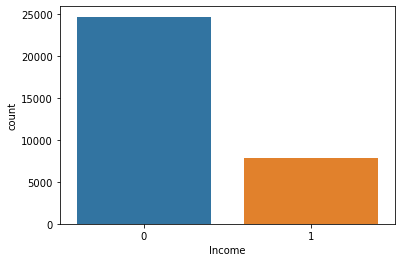

In [103]:
sns.countplot(y)

In [104]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [105]:
x, y = smote.fit_resample(x,y)

In [106]:
y.value_counts()

# 0    24719
# 1    24719
# Name: Income, dtype: int64

0    24719
1    24719
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

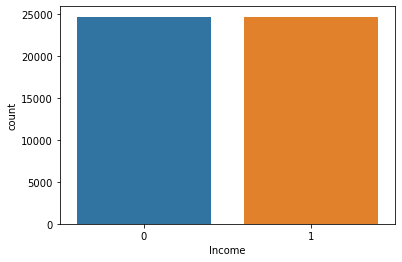

In [107]:
sns.countplot(y)

In [108]:
encoded_df.head(2)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_Higher Education,Education_School,Marital_status_Married,Marital_status_Other,Marital_status_Unmarried,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Remove Skewness

In [109]:
x.skew()

Age                                             0.341654
Fnlwgt                                          1.438014
Education_num                                  -0.432086
Capital_gain                                    8.347916
Capital_loss                                    3.756087
Hours_per_week                                  0.135001
Workclass_ Federal-gov                          6.841772
Workclass_ Local-gov                            4.414639
Workclass_ Never-worked                        84.023806
Workclass_ Private                             -0.609803
Workclass_ Self-emp-inc                         6.111655
Workclass_ Self-emp-not-inc                     3.926387
Workclass_ State-gov                            5.850564
Workclass_ Without-pay                         59.401179
Education_ Bachelors                            2.120705
Education_ Doctorate                           10.385720
Education_ HS-grad                              1.293934
Education_ Masters             

In [110]:
# Age                                             0.349552
# Fnlwgt                                          1.443612
# Education_num                                  -0.430098
# Capital_gain                                    8.436951
# Capital_loss                                    3.786194
# Hours_per_week                                  0.137717

In [111]:
skewed_col = [ 'Fnlwgt', 'Capital_gain', 'Capital_loss' ]  # columns fow which skewness treating operation have to perform

In [112]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [113]:
x[skewed_col] = pt.fit_transform(x[skewed_col])

# applying to whole dataset, because giving better accuracy

In [114]:
x.skew()

# Age                                             0.343426
# Fnlwgt                                          0.019140
# Education_num                                  -0.425881
# Capital_gain                                    2.214348
# Capital_loss                                    3.534201
# Hours_per_week                                  0.128084


Age                                             0.341654
Fnlwgt                                          0.020333
Education_num                                  -0.432086
Capital_gain                                    2.222431
Capital_loss                                    3.538268
Hours_per_week                                  0.135001
Workclass_ Federal-gov                          6.841772
Workclass_ Local-gov                            4.414639
Workclass_ Never-worked                        84.023806
Workclass_ Private                             -0.609803
Workclass_ Self-emp-inc                         6.111655
Workclass_ Self-emp-not-inc                     3.926387
Workclass_ State-gov                            5.850564
Workclass_ Without-pay                         59.401179
Education_ Bachelors                            2.120705
Education_ Doctorate                           10.385720
Education_ HS-grad                              1.293934
Education_ Masters             

In [117]:
# Almost Every column is showing skewness value which is in acceptable range, Now, we move ahead
# Maximum value of Capital gain and Capital Loss column having value zero therefore, we are leaving 
# this column skewness as it is


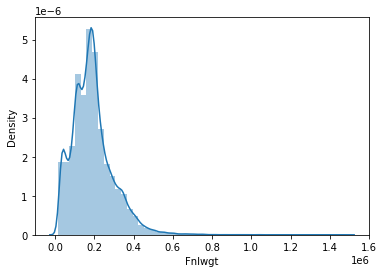

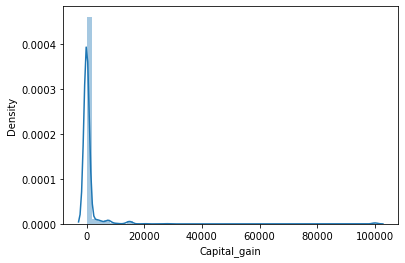

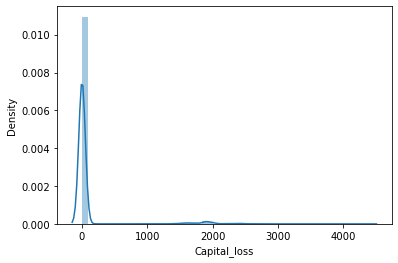

In [116]:
for i in skewed_col:
    plt.figure()
    sns.distplot(encoded_df[i])

In [118]:
encoded_df.head(2)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_Higher Education,Education_School,Marital_status_Married,Marital_status_Other,Marital_status_Unmarried,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Multicoliearity

##### Using VIF Technique

In [119]:
# using VIF Technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [121]:
cal_vif(x)

# Columns Name	VIF
# 0	Age	15.088554
# 1	Fnlwgt	1.044357
# 2	Education_num	40.014015
# 3	Capital_gain	1.083809
# 4	Capital_loss	1.040702
# 5	Hours_per_week	15.780386

,Columns Name,VIF
0,Age,15.020487
1,Fnlwgt,1.044516
2,Education_num,39.271949
3,Capital_gain,1.082523
4,Capital_loss,1.041745
5,Hours_per_week,15.706126
6,Workclass_ Federal-gov,1.267350
7,Workclass_ Local-gov,1.596667
8,Workclass_ Never-worked,1.004087
9,Workclass_ Private,6.884443


In [123]:
# As we can see Education_num is showing highest vif value, therefore we need to remove this column from
# training dataset

In [124]:
x.drop(columns = 'Education_num', inplace = True )

In [125]:
cal_vif(x)

# Columns Name	VIF
# 0	Age	13.319732
# 1	Fnlwgt	1.042878
# 2	Capital_gain	1.078933
# 3	Capital_loss	1.039253
# 4	Hours_per_week	13.232717

,Columns Name,VIF
0,Age,13.180978
1,Fnlwgt,1.043908
2,Capital_gain,1.078787
3,Capital_loss,1.040815
4,Hours_per_week,13.198876
5,Workclass_ Federal-gov,1.267314
6,Workclass_ Local-gov,1.596634
7,Workclass_ Never-worked,1.004083
8,Workclass_ Private,6.869430
9,Workclass_ Self-emp-inc,1.303507


In [126]:
# Every columns are showing vif value under acceptable range

## Scaling

In [127]:
x.head(2)

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_Higher Education,Education_School,Marital_status_Married,Marital_status_Other,Marital_status_Unmarried,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,-1.10073,-0.383718,-0.263073,13,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,0.40146,-0.383718,-0.263073,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [128]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [129]:
scale_col = ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
scale_col

# ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

In [130]:
x[scale_col] = ss.fit_transform(x[scale_col])

In [131]:
x.head()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_Higher Education,Education_School,Marital_status_Married,Marital_status_Other,Marital_status_Unmarried,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.779740,-1.100730,-0.383718,-0.263073,-2.523612,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.187751,0.401460,-0.383718,-0.263073,-0.176606,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.021613,0.566480,-0.383718,-0.263073,-0.176606,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.993993,1.349537,-0.383718,-0.263073,-0.176606,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.268375,0.963879,-0.383718,-0.263073,-0.176606,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [132]:
encoded_df.head(2)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_Higher Education,Education_School,Marital_status_Married,Marital_status_Other,Marital_status_Unmarried,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Machine Learning

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [134]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0,100 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [135]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

        print('At random state', i, 'the training accuracy is :-', training)
        print('At random state', i, 'the testing accuracy is :-', testing) 
        print('_________________________________________________________________')

In [136]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    m_pred = model.predict(x_train)
    
    training = accuracy_score(m_pred, y_train)
    testing = accuracy_score(pred, y_test)

    print('Training accuracy is : ', training)
    print('Testing accuracy is :', testing) 
    
    print('__________________________________________________________________')
    print('Classification Report: \n', classification_report(pred, y_test) )
    print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
    print('___________________________________________________________________')
    print('Cross value score')
    
    # perform cross-validation
    for i in range(4, 12):
        cv_score = cross_val_score(model, x, y, cv = i ).mean()
        print('cv score',  cv_score ,'at', i, 'cross fold')


#### Model 1: LogisticRegression

In [137]:
check_model(LogisticRegression, x, y, range(51, 61))

At random state 51 the training accuracy is :- 0.8942668901346588
At random state 51 the testing accuracy is :- 0.8942152103559871
_________________________________________________________________
At random state 52 the training accuracy is :- 0.8944113737502167
At random state 52 the testing accuracy is :- 0.8930016181229773
_________________________________________________________________
At random state 53 the training accuracy is :- 0.8940935097959891
At random state 53 the testing accuracy is :- 0.8950242718446602
_________________________________________________________________
At random state 54 the training accuracy is :- 0.8945847540888863
At random state 54 the testing accuracy is :- 0.8936084142394822
_________________________________________________________________
At random state 55 the training accuracy is :- 0.8960584869675778
At random state 55 the testing accuracy is :- 0.8903721682847896
_________________________________________________________________
At random state

In [138]:
train(LogisticRegression, x, y, 57)

Training accuracy is :  0.8955094492284575
Testing accuracy is : 0.8906418554476807
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89      7807
           1       0.86      0.91      0.89      7025

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832

Confusion Matrix: 
 [[6803 1004]
 [ 618 6407]]
___________________________________________________________________
Cross value score
cv score 0.8564702792483028 at 4 cross fold
cv score 0.8709324120654006 at 5 cross fold
cv score 0.8734001469449703 at 6 cross fold
cv score 0.8776290808898543 at 7 cross fold
cv score 0.8809446738902149 at 8 cross fold
cv score 0.8817136876776737 at 9 cross fold
cv score 0.8829268793697995 at 10 cross fold
cv score 0.8851183742568771 at 11 cross fold


In [139]:
# As we can see in above observation , 
# training accuracy, testing accuracy and cv score at cross fold 11 is very near to each other
# This model can be our best fit model
# Lets check, other model of classifier

#### Model 2: DecisionTreeClassifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
random_state2 = range(51, 61)
print(random_state2)

range(51, 61)


In [177]:
check_model(DecisionTreeClassifier, x, y, random_state2)

At random state 51 the training accuracy is :- 0.9999422065537767
At random state 51 the testing accuracy is :- 0.8718985976267529
_________________________________________________________________
At random state 52 the training accuracy is :- 0.9999422065537767
At random state 52 the testing accuracy is :- 0.8689320388349514
_________________________________________________________________
At random state 53 the training accuracy is :- 0.9999422065537767
At random state 53 the testing accuracy is :- 0.8708872707659115
_________________________________________________________________
At random state 54 the training accuracy is :- 0.9999422065537767
At random state 54 the testing accuracy is :- 0.8663025889967637
_________________________________________________________________
At random state 55 the training accuracy is :- 0.9999711032768884
At random state 55 the testing accuracy is :- 0.8681229773462783
_________________________________________________________________
At random state

In [178]:
# Model is giving maxium accuracy of 87% at random state of 60

In [179]:
train(DecisionTreeClassifier, x, y, 60)

Training accuracy is :- 1.0
Testing accuracy is :- 0.8727750809061489
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      7468
           1       0.87      0.87      0.87      7364

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832

Confusion Matrix: 
 [[6547  921]
 [ 966 6398]]
___________________________________________________________________
Cross value score
cv score 0.8523227196956427 at 4 cross fold
cv score 0.8594628136944233 at 5 cross fold
cv score 0.8588357291923211 at 6 cross fold
cv score 0.8610417082638387 at 7 cross fold
cv score 0.8634070484064671 at 8 cross fold
cv score 0.8644591688138326 at 9 cross fold
cv score 0.8674121596229378 at 10 cross fold
cv score 0.8672967041413809 at 11 cross fold


In [180]:
# Accuracy of Testing and value of CV are near but training accuracy is higher than testing model is giving overfitted model
# We cannot consider this model for our model building

### Model 3:  RandomForestClassifier

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
random_state3=range(51, 61)

In [183]:
check_model(RandomForestClassifier, x, y, random_state3 )

At random state 51 the training accuracy is :- 0.9998844131075536
At random state 51 the testing accuracy is :- 0.901564185544768
_________________________________________________________________
At random state 52 the training accuracy is :- 0.9999422065537767
At random state 52 the testing accuracy is :- 0.8961030204962244
_________________________________________________________________
At random state 53 the training accuracy is :- 0.9999422065537767
At random state 53 the testing accuracy is :- 0.9011596548004315
_________________________________________________________________
At random state 54 the training accuracy is :- 0.9998844131075536
At random state 54 the testing accuracy is :- 0.899878640776699
_________________________________________________________________
At random state 55 the training accuracy is :- 0.9999422065537767
At random state 55 the testing accuracy is :- 0.8959007551240561
_________________________________________________________________
At random state 5

In [184]:
train(RandomForestClassifier, x, y, 51)

Training accuracy is :- 0.9999133098306652
Testing accuracy is :- 0.9008225458468176
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      7572
           1       0.89      0.91      0.90      7260

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

Confusion Matrix: 
 [[6752  820]
 [ 651 6609]]
___________________________________________________________________
Cross value score
cv score 0.8738447928883764 at 4 cross fold
cv score 0.8848481960228248 at 5 cross fold
cv score 0.8858191352321877 at 6 cross fold
cv score 0.887923948108588 at 7 cross fold
cv score 0.8915230284641947 at 8 cross fold
cv score 0.8924538059746779 at 9 cross fold
cv score 0.8936671665399796 at 10 cross fold
cv score 0.8939561306739793 at 11 cross fold


In [117]:
# Maximum cross value 0.89 we are getting at cross fold 11
# Acurracy of training data is 0.99
# Accuracy of testiing data is 0.90
# Accuracy of training > Accuracy of Testing  (overfitted model)

### Model 4: KNeighborsClassifier

In [186]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
# random_state4 = best_randomstate(KNeighborsClassifier, x, y)
# print(random_state4)

In [188]:
check_model(KNeighborsClassifier, x, y, range(51, 61) )

At random state 51 the training accuracy is :- 0.9120961682945155
At random state 51 the testing accuracy is :- 0.8805285868392665
_________________________________________________________________
At random state 52 the training accuracy is :- 0.9140033520198809
At random state 52 the testing accuracy is :- 0.8791801510248112
_________________________________________________________________
At random state 53 the training accuracy is :- 0.914292319250997
At random state 53 the testing accuracy is :- 0.8774946062567421
_________________________________________________________________
At random state 54 the training accuracy is :- 0.9139455585736578
At random state 54 the testing accuracy is :- 0.8768878101402373
_________________________________________________________________
At random state 55 the training accuracy is :- 0.9144945963127782
At random state 55 the testing accuracy is :- 0.8762810140237325
_________________________________________________________________
At random state 

In [189]:
train(KNeighborsClassifier, x, y, 59)

Training accuracy is :- 0.9112870600473906
Testing accuracy is :- 0.8802588996763754
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      7104
           1       0.90      0.87      0.88      7728

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832

Confusion Matrix: 
 [[6352  752]
 [1024 6704]]
___________________________________________________________________
Cross value score
cv score 0.8595436884039015 at 4 cross fold
cv score 0.8674928901276987 at 5 cross fold
cv score 0.8680187857616176 at 6 cross fold
cv score 0.8701843019572241 at 7 cross fold
cv score 0.8721046132610141 at 8 cross fold
cv score 0.8735411589981901 at 9 cross fold
cv score 0.8746330170415225 at 10 cross fold
cv score 0.8748407681292611 at 11 cross fold


In [190]:
# Accuracy of training : 0.91
# Accuracy of testing : 0.88
# CV score is giving highest value (0.8748) at cross fold 11
# As we have other model too which are performing better than this model,

In [191]:
# # Observation 

# 	Model	                   Accuracy of Training	    Accuracy of Testing	     CV Score	      difference
# 1	LogisticRegression	       0.89	                    0.890237	             0.88511	      0.005127
# 2	DecisionTreeClassifier	   1	                    0.87	                 0.86	          0.01
# 3	RandomForestClassifier	   0.99	                    0.9	                     0.89	          0.01
# 4	KNeighborsClassifier	   0.91	                    0.88025	                 0.87484	      0.00541

In [192]:
# As we can observed, least difference of cv and testing accuracy is 0.005127, by LogisticRegression,
# And Accuracy of testing data is almost equal to accuray of testing data.
# Therefore, we will perform further proceedings onto Logistic model for model building

### Final Model (LogisticRegression)

##### Ensemble Technique

In [193]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 57)

# Logistice is givng good accuracy (0.89) at random state 57  and highest cv (0.88) at cross fold 11
# Therefore, we will use these values for further proceedings

#### Hyper Parameter Tuning

In [198]:
parameter = {'penalty' : ['l1', 'l2', 'none'], 
             'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
             'max_iter' : [100, 110, 120], 
            'multi_class' : ['auto', 'ovr', 'multinomial']}

In [199]:
gcv = GridSearchCV(estimator = LogisticRegression(), param_grid = parameter, cv = 11)
gcv.fit(x_train, y_train)

GridSearchCV(cv=11, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 110, 120],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [200]:
gcv.best_params_

{'max_iter': 110, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

##### Selection of paramenter and random_state to avoid over fitted and under fitted model

In [201]:
best_fit = []
for i in range(0, 100) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    m = LogisticRegression(max_iter = 110, multi_class = 'auto', penalty = 'l2', solver = 'lbfgs')
    m.fit(x_train, y_train)
    m_predict_train = m.predict(x_train)
    m_predict_test = m.predict(x_test)

    training = accuracy_score(m_predict_train, y_train)
    testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

    if np.abs(round(training, 2) - round(testing, 2)) < 0.005:
        best_fit.append(i)


In [202]:
print(best_fit)

[1, 3, 8, 10, 12, 15, 16, 19, 22, 23, 26, 34, 38, 44, 45, 47, 48, 50, 51, 52, 53, 54, 58, 60, 63, 64, 67, 72, 74, 75, 76, 79, 80, 81, 84, 85, 86, 87, 91, 92, 97]


In [204]:
max_acc = 0
random_s = 0

for i in best_fit:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model = LogisticRegression(max_iter = 110, multi_class = 'auto', penalty = 'l2', solver = 'lbfgs')
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.8949568500539374 on random state of 19


### Final Model using LogisticRegression

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 19)
final_model = LogisticRegression(max_iter = 110, multi_class = 'auto', penalty = 'l2', solver = 'lbfgs')
final_model.fit(x_train, y_train)
predict_train = final_model.predict(x_train)
predict_test = final_model.predict(x_test)

training = accuracy_score(predict_train, y_train)
testing = accuracy_score(predict_test, y_test)

print('At random state', i, 'the training accuracy is :-', training)
print('At random state', i, 'the testing accuracy is :-', testing) 
print('_________________________________________________________________')
print('Classification Report: \n', classification_report(predict_test, y_test) )
print('Confusion Matrix: \n', confusion_matrix(predict_test, y_test) )
print('___________________________________________________________________')
print('Cross value score')
    
    
    # perform cross-validation
for i in range(4, 12):
    cv_score = cross_val_score(model, x, y, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

At random state 11 the training accuracy is :- 0.8938623360110963
At random state 11 the testing accuracy is :- 0.8949568500539374
_________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      7785
           1       0.87      0.92      0.89      7047

    accuracy                           0.89     14832
   macro avg       0.90      0.90      0.89     14832
weighted avg       0.90      0.89      0.90     14832

Confusion Matrix: 
 [[6797  988]
 [ 570 6477]]
___________________________________________________________________
Cross value score
cv score 0.856187094634598 at 4 cross fold
cv score 0.8706492446359068 at 5 cross fold
cv score 0.8732990093489369 at 6 cross fold
cv score 0.8775684082336758 at 7 cross fold
cv score 0.8812076188740336 at 8 cross fold
cv score 0.8821182356066845 at 9 cross fold
cv score 0.8830886916675343 at 10 cross fold
cv score 0

In [172]:
# As we can see final model is giving training accuracy of 0.893862 and testing accuracy of 0.89495
# Very less difference between accuracy of testing and training data
# And we can see, highest value of cv is 0.885017, very near to our model accuracy 

### AOC - ROC Curve

In [207]:
final_pred_prob = final_model.predict_proba(x_test)[:, 1]  #  probability of getting 1

# <=50K (0) : getting less than or equal to 50K
# > 50K (1) : Getting more than 50K

In [208]:
fpr, tpr, threshols = roc_curve(y_test, final_pred_prob)  
#  By the use of fpr and tpr we create AUC ROC curve

In [213]:
# fpr
# tpr
# threshols

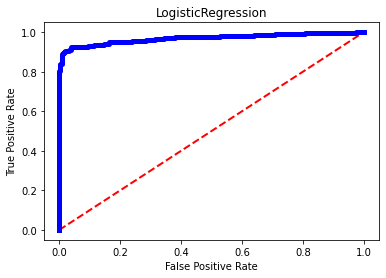

In [176]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fpr, tpr, color = 'b', lw = 5, label = 'ROC Curve')   # graph for AOC ROC curve
plt.xlabel('False Positive Rate')  # x axis
plt.ylabel('True Positive Rate')   # y axis
plt.title('LogisticRegression')  # Title
plt.show()

In [177]:
# As our model is giving accuracy of 89.51 % , therefore, curve is little not perfect sharp

In [214]:
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
auc_score
# 0.8951384820943054

0.8951384820943054

### Deploy Model

In [215]:
import pickle
filename = 'Census_income_prediction.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))         # operation to deploy model

### Loading model

In [216]:
load_model =  pickle.load(open('Census_income_prediction.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result) 

# 0.8949568500539374

0.8949568500539374


### Conclusion

In [218]:
predicted_income = np.array(load_model.predict(x_test))  
original_income = np.array(y_test)
# convert columns in to np.array 

In [219]:
print(predicted_income.shape)
print(original_income.shape)
print(x_test.shape)
print(y_test.shape)

# (740,)
# (740,)
# (740, 51)
# (740,)

(14832,)
(14832,)
(14832, 90)
(14832,)


In [220]:
conclusion = pd.DataFrame({'Original Income': original_income, 'Predicted Income': predicted_income}, index = range(len(original_attrition)))
# Dataframe creation

In [225]:
pd.set_option('display.max_rows', None)  # To maximize the rows
conclusion.tail()


,Original Income,Predicted Income
14827,1,1
14828,0,0
14829,1,1
14830,0,0
14831,0,0


In [227]:
conclusion.sample(10)

,Original Income,Predicted Income
1202,0,0
14613,1,1
496,0,0
4410,0,0
9632,1,1
6726,0,0
3885,1,1
8664,0,0
11166,1,1
7790,0,0
